# Matrix Solutions 
## Introduction to Linear Programming

This gives some foundational methods of working with arrays to do matrix multiplication


In [5]:
import numpy as np
#Let's put in a m(rows) x n(columns)
quant = np.array([[8, 5, 8, 0], 
                  [8, 2, 4, 0],
                  [8, 7, 7, 5]])  

price = np.array([75,50,10,105])

In [10]:
#This prints a 3 x 4 matrix
quant 

array([[8, 5, 8, 0],
       [8, 2, 4, 0],
       [8, 7, 7, 5]])

In [12]:
#Price is a 1 x 4
price

array([ 75,  50,  10, 105])

In [11]:
#This performance the transpose operation on the matrix.
#This turns a 3 x 4 matrix to a 4 x 3 matrix
quant.T

array([[8, 8, 8],
       [5, 2, 7],
       [8, 4, 7],
       [0, 0, 5]])

If vectors are identified with row matrices, the dot product can also be written as a matrix product

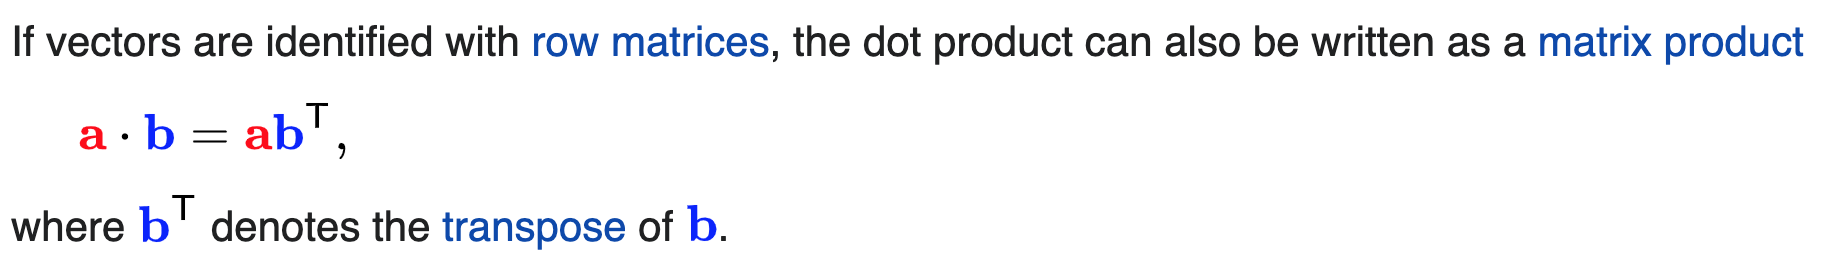
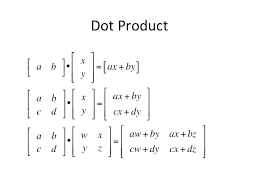

In [7]:
#Remember that the dot product is the same as the sumproduct here.
#Here multipying a 3 x 4 by a 1 x 4 matrix. 
#The 1 x 4 matrix is really a 4 x 1 because the dot product involves the 
#The transpose of the matrix.

sum_cost= quant.dot(price)
sum_cost

array([ 930,  740, 1545])

In [9]:
#Notice when multiplying we have to keep the inner numbers the same.
# 1 x 4    by a 4 x 3
price.dot(quant.T)

array([ 930,  740, 1545])

In [1]:
!pip install pulp

In [2]:
#Import some required packages. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

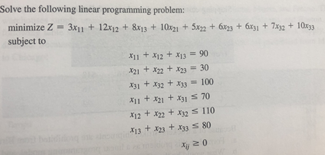


In [21]:
#Initialize the model as a minimization problem. 
import pulp as pl
opt_model = pl.LpProblem("MIPModel", pl.LpMinimize)


In [25]:
#Set the variables. Notice this is where we put 
# the "non-negativity" constraint
for x in range(1,4):
    for y in range(1,4):
        var='x'+str(x)+str(y)
        print(var)
        #this systematically creates all the variables. 
        exec(var +' = pl.LpVariable(cat=pl.LpInteger, lowBound=0, name="$'+var+'$")')
#x1 =pl.LpVariable(cat=pl.LpInteger, lowBound=0, name="$x_{1}$") 
#x2 =pl.LpVariable(cat=pl.LpInteger, lowBound=0, name="$x_{2}$") 

x11
x12
x13
x21
x22
x23
x31
x32
x33


In [5]:
#Set the objective function
opt_model += np.array([x11, x12, x13], \
                  [x21, x22, x23],\
                  [x11, x12, x13]])  

In [6]:
#Set the Constraints
opt_model += 2 * x1  + 4* x2  >= 16

opt_model += 4 * x1 + 3 * x2 >= 24

## Review Model

Now that we have created the model we can review it. 

In [7]:
opt_model

MIPModel:
MINIMIZE
6*$x_{1}$ + 3*$x_{2}$ + 0
SUBJECT TO
_C1: 2 $x_{1}$ + 4 $x_{2}$ >= 16

_C2: 4 $x_{1}$ + 3 $x_{2}$ >= 24

VARIABLES
0 <= $x_{1}$ Integer
0 <= $x_{2}$ Integer

## Markdown of output
If we copy the above text into a markdown cell you will see the implications of the varous models. 


MIPModel:

MINIMIZE

6*$x_{1}$ + 3*$x_{2}$ + 0

SUBJECT TO

_C1: 2 $x_{1}$ + 4 $x_{2}$ >= 16

_C2: 4 $x_{1}$ + 3 $x_{2}$ >= 24

VARIABLES

0 <= $x_{1}$ Integer

0 <= $x_{2}$ Integer


## Solve

We now solve the system of equations with the solve command. 

In [8]:
#Solve the program
opt_model.solve()


1

## Check the Status

Here are 5 status codes:
* **Not Solved**: Status prior to solving the problem.
* **Optimal**: An optimal solution has been found.
* **Infeasible**: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
* **Unbounded**: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
* **Undefined**: The optimal solution may exist but may not have been found.

In [9]:
pl.LpStatus[opt_model.status]

'Optimal'

In [10]:
for variable in opt_model.variables():
    print(variable.name," = ", variable.varValue)

$x_{1}$  =  0.0
$x_{2}$  =  8.0


## Hurray! 
We got the same answer as we did before. 

## Exercise

Solve the LP problem for Beaver Creek Pottery using the maximization model type (`pl.LpMaximize`).


### Product mix problem - Beaver Creek Pottery Company
How many bowls and mugs should be produced to maximize profits given labor and materials constraints?

Product resource requirements and unit profit:

Decision Variables:

$x_{1}$ = number of bowls to produce per day

$x_{2}$ = number of mugs to produce per day


Profit (Z)  Mazimization

Z = 40$x_{1}$ + 50$x_{2}$

Labor Constraint Check

1$x_{1}$ + 2$x_{2}$ <= 40

Clay (Physicial Resource) Constraint Check

4$x_{1}$ + 3$x_{2}$ <= 120

Negative Production Constaint Check

$x_{1}$ > 0

$x_{2}$ > 0



## Sensitivity Analysis

In [13]:
for name, c in opt_model.constraints.items():
    print (name, ":", c, "\t", c.pi, "\t\t", c.slack)

_C1 : 2*$x_{1}$ + 4*$x_{2}$ >= 16 	 0.0 		 -16.0
_C2 : 4*$x_{1}$ + 3*$x_{2}$ >= 24 	 0.0 		 -0.0
